In [17]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt


In [18]:

sys.path.append(os.path.abspath(os.path.join('..')))

In [ ]:
#!pip install pandas matplotlib

In [19]:
from scripts.utils import *

In [20]:
df = load_data('../data/raw_analyst_ratings.csv')

In [21]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [22]:
df.tail()

,Unnamed: 0,headline,url,publisher,date,stock
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX
1407327,1413848,China Zenix Auto International Opens For Tradi...,https://www.benzinga.com/news/ipos/11/05/10789...,Allie Wickman,2011-05-12 00:00:00,ZX


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [24]:
print(f"Start date: {df['date'].min()}")
print(f"End date: {df['date'].max()}")



Start date: 2009-02-14 00:00:00
End date: 2020-06-11 17:12:35-04:00


In [25]:
df.describe()

,Unnamed: 0
count,1.407328e+06
mean,7.072454e+05
std,4.081009e+05
min,0.000000e+00
25%,3.538128e+05
50%,7.072395e+05
75%,1.060710e+06
max,1.413848e+06


In [26]:
df.isnull().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [27]:
df['date'] = pd.to_datetime(df['date'], format='mixed', utc=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype              
---  ------      --------------    -----              
 0   Unnamed: 0  1407328 non-null  int64              
 1   headline    1407328 non-null  object             
 2   url         1407328 non-null  object             
 3   publisher   1407328 non-null  object             
 4   date        1407328 non-null  datetime64[ns, UTC]
 5   stock       1407328 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(4)
memory usage: 64.4+ MB


In [29]:
headline_stat = headline_length(df)
print("Headline Length Statistics:")
print(headline_stat)

Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


### articles per publisher


Top 10 Most Active Publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


<Axes: title={'center': 'Top 10 Most Active Publishers '}>

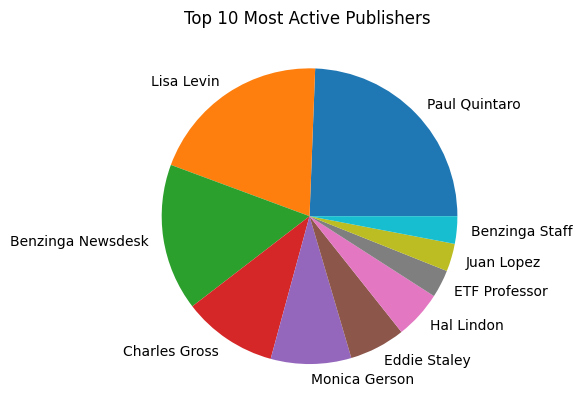

In [34]:
publisher_counts = articles_per_publisher(df)
print("\nTop 10 Most Active Publishers:")
print(publisher_counts.head(10))

publisher_counts.head(10).plot(kind="pie", title="Top 10 Most Active Publishers ", ylabel='')

### Analysis of publication dates to see trends over time

In [15]:
date_analysis = publication_dates(df)
print("\nTop 5 Days with Most Articles:")
print(date_analysis['top_days'])

print("\nArticle Distribution by Weekday:")
print(date_analysis['weekday_counts'])

print("\n Monthly Trends ")
print(date_analysis['monthly_counts'])



Top 5 Days with Most Articles:
date
2020-03-12    2739
2020-02-28    1620
2020-03-19    1595
2020-02-27    1567
2020-03-06    1428
dtype: int64

Article Distribution by Weekday:
date
Thursday     302619
Wednesday    300922
Tuesday      296505
Monday       265139
Friday       217918
Sunday        16466
Saturday       7759
Name: count, dtype: int64

 Monthly Trends 
date
2009-02-01        1
2009-04-01        3
2009-05-01       12
2009-06-01       40
2009-07-01       75
              ...  
2020-02-01    18878
2020-03-01    24995
2020-04-01    20757
2020-05-01    17992
2020-06-01     6447
Length: 136, dtype: int64


d:\KIFYA AIM\Week 1\Week-1 Project\Financial-news-Stock-Analysis\scripts\utils.py:45: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_counts = df.groupby(df['date'].dt.to_period('M').dt.to_timestamp()).size()


### Plot the publication trends based on date analysis

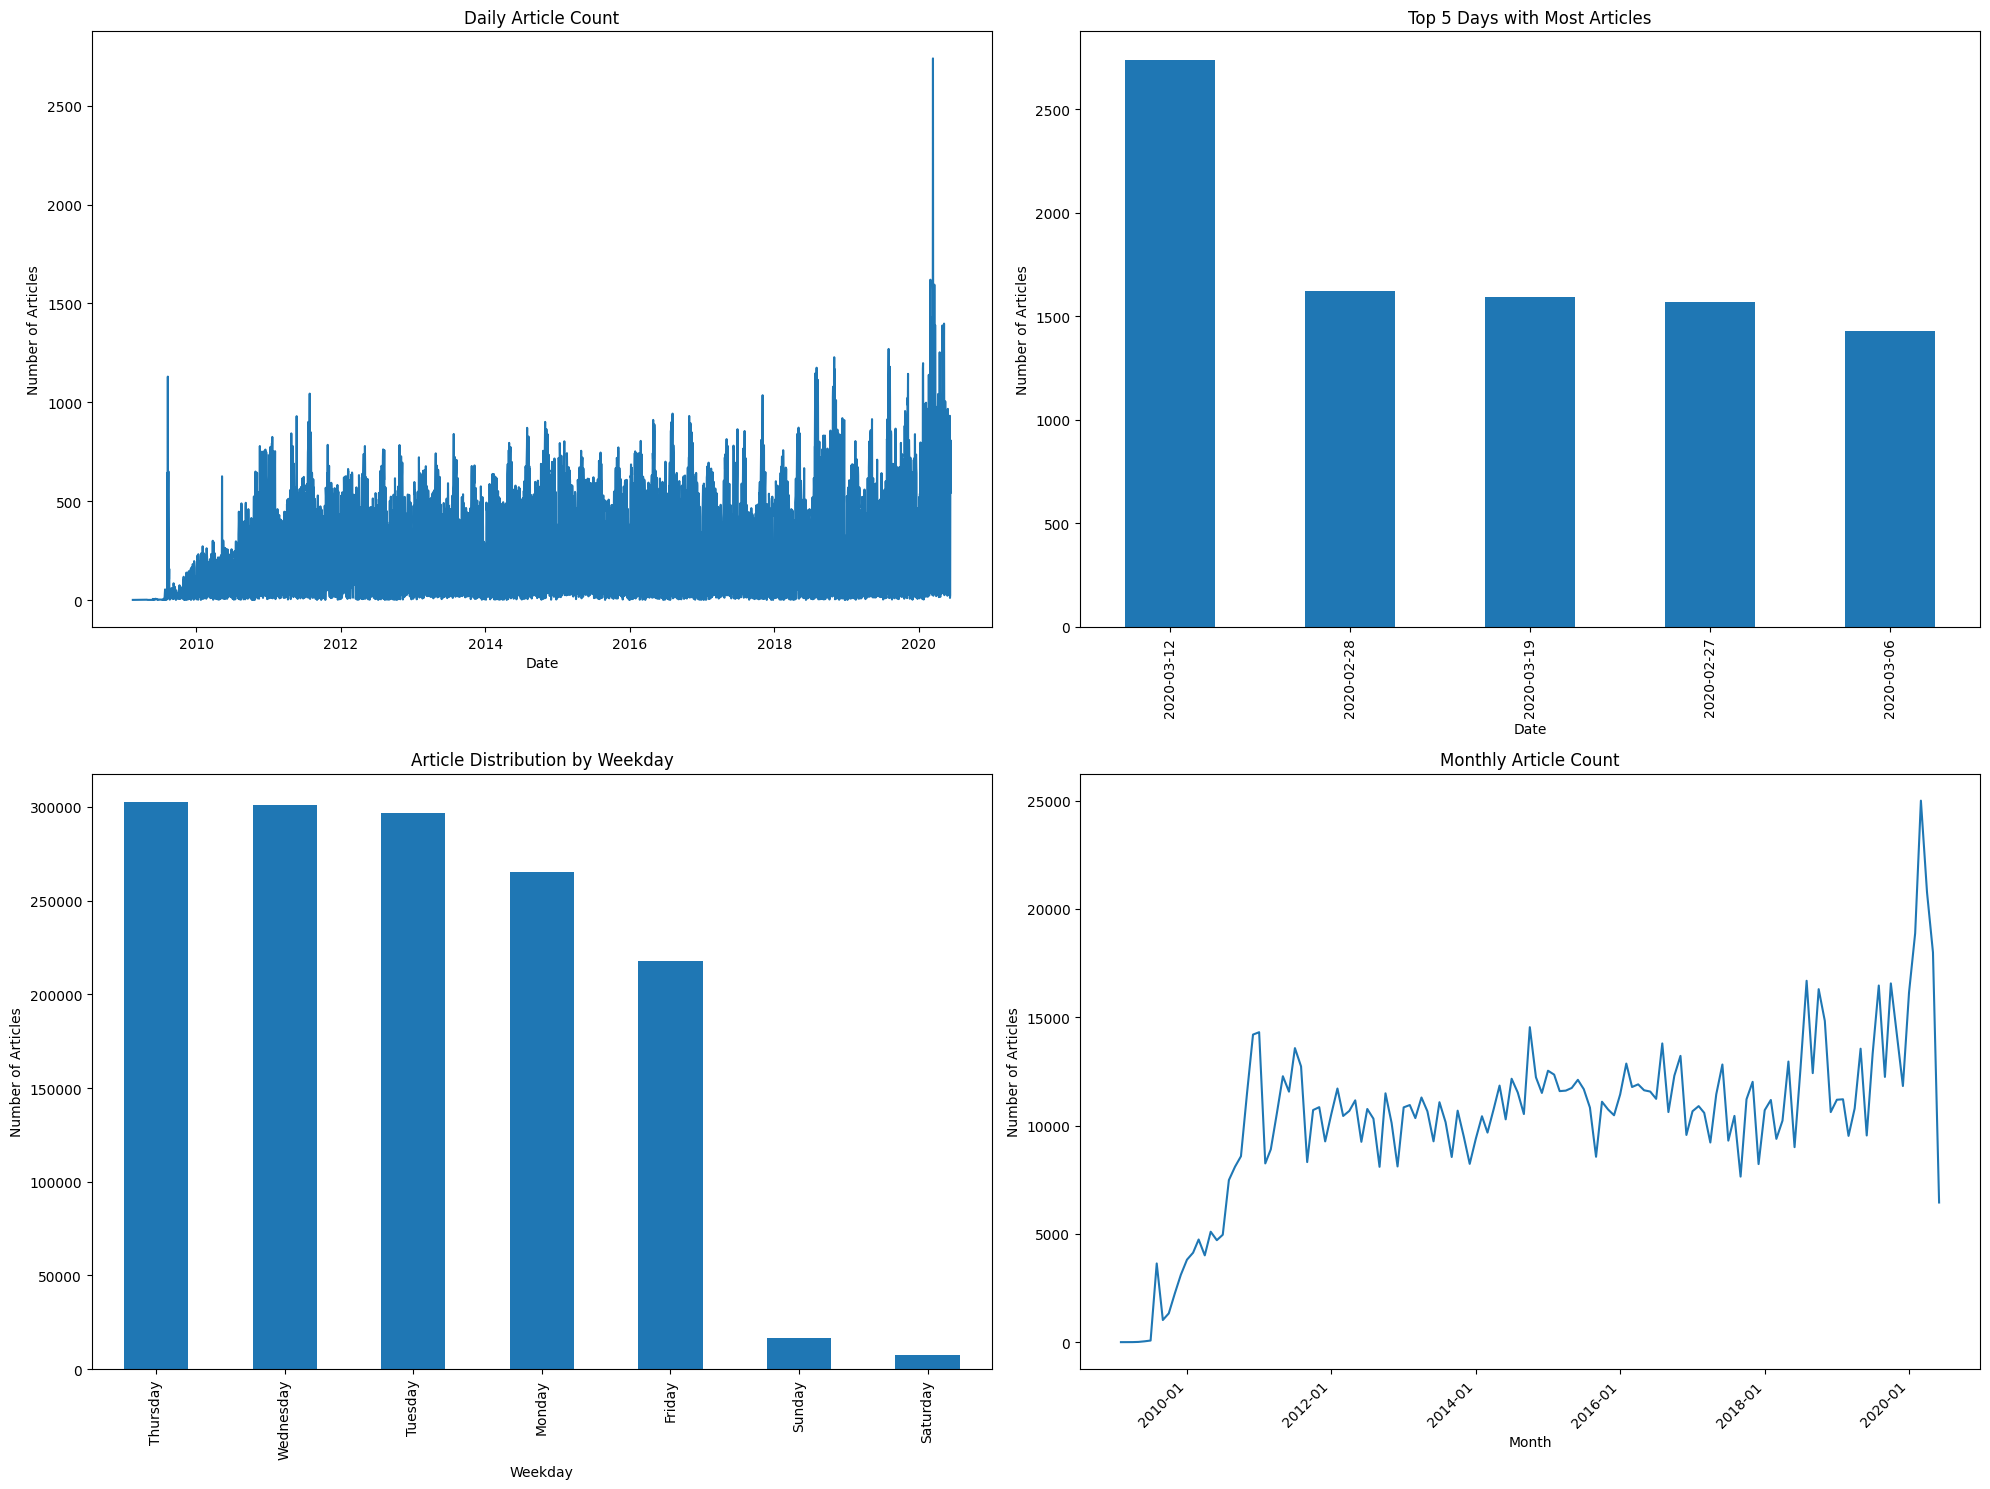

In [16]:
fig = plot_publication_trends(date_analysis)
plt.show()